<a href="https://colab.research.google.com/github/Marcin19721205/IntroductionToBigDataWSB/blob/main/Zadanie_Nr4_MJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PCA
Przeanalizuj przykład zamieszczony w pliku pca_01a_s.r wraz z opisem. Następnie przeprowadź
samodzielnie analizę głównych składowych PCA w języku R dla zbioru mtcars.

zadanie w Python

Import pliku csv - wyeksportowanego z R

In [41]:
# === import stack ===
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
#
# === wczytaj dane ===
df = pd.read_csv('sample_data/mtcars_data.csv')

# === szybki podgląd ===
print(df.head())
print("\nInformacje o danych:")
print(df.info())


    mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  carb
0  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4     4
1  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4     4
2  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4     1
3  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3     1
4  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3     2

Informacje o danych:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtyp

#punkt b

https://rstudio-pubs-static.s3.amazonaws.com/526159_0a436b7468e6421a8403a672dbbe3840.html

analizę PCA należy przeprowadzić na następującym podzbiorze mtcars:



mtcars[,c(1:7,10,11)]

In [42]:
#b) podzbiór kolumn jak w w poleceniu c(1:7,10,11)
cols = ['mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']
cols_sel = ['mpg','qsec','gear','carb']
#X = df[cols].copy()
X=df[cols_sel].copy()

#print(X.shape)
#print(X_sel)
#X.head()
X.head(10)


,mpg,qsec,gear,carb
0,21.0,16.46,4,4
1,21.0,17.02,4,4
2,22.8,18.61,4,1
3,21.4,19.44,3,1
4,18.7,17.02,3,2
5,18.1,20.22,3,1
6,14.3,15.84,3,4
7,24.4,20.00,4,2
8,22.8,22.90,4,2
9,19.2,18.30,4,4


#punkt c

wypisz wyniki analizy zawierające
zmienności (funkcja summary)

In [43]:
#analiza głównych składowych dla X dla wybranych kolumn
#
#
#Z-score - standaryzacja z danych (X) i wpisanie do X_std
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#
#PCA na wystandaryzowanych danych
#import klasy PCA()
pca = PCA()
scores = pca.fit_transform(X_std)
#
# PCA summary z biblioteki PCA - PC1,2, nazwa składowej
summary = pd.DataFrame({
    'PC': [f'PC{i+1}' for i in range(pca.n_components_)],
    'Wartosci Wlasne': pca.explained_variance_,#wariancja
    'Udziały wzgledne': pca.explained_variance_ratio_,
    'Wartości Wlasne_%': 100 * pca.explained_variance_ratio_,
    'Udziały wzgledne_%': 100 * np.cumsum(pca.explained_variance_ratio_)
}).round(4) #zaokrąglenie do czterech znaczacych
#
print("SUMMARY PCA")
print(summary) #wydrukuj podsume PCA

#Macierz ładunków - wkład zmiennych w PC
loadings = pd.DataFrame(
    pca.components_.T,
    index=X.columns,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)]
).round(4)
#
print("\nLOADINGS-ładunki")
print(loadings)
#
#Kontrola standaryzacji
print("\nSrednie po standaryzacji (≈0):", np.round(X_std.mean(axis=0), 3))
print("Odchylenia std (≈1):          ", np.round(X_std.std(axis=0, ddof=0), 3))


SUMMARY PCA
    PC  Wartosci Wlasne  Udziały wzgledne  Wartości Wlasne_%  \
0  PC1           2.1586            0.5228            52.2776   
1  PC2           1.4566            0.3528            35.2763   
2  PC3           0.3901            0.0945             9.4481   
3  PC4           0.1238            0.0300             2.9979   

   Udziały wzgledne_%  
0             52.2776  
1             87.5540  
2             97.0021  
3            100.0000  

LOADINGS-ładunki
         PC1     PC2     PC3     PC4
mpg  -0.5201  0.5074 -0.2365  0.6451
qsec -0.5825 -0.1991  0.7877 -0.0243
gear  0.0412  0.8181  0.2209 -0.5293
carb  0.6233  0.1833  0.5242  0.5505

Srednie po standaryzacji (≈0): [-0. -0. -0. -0.]
Odchylenia std (≈1):           [1. 1. 1. 1.]


#punkt d
Wizualizacja

fviz_eig → wykres udziału wariancji (scree plot)

PC1 (Principal Component 1) to pierwsza główna składowa —
czyli nowa oś współrzędnych, wyznaczona przez PCA, która: tłumaczy największą możliwą część całkowitej zmienności danych.

masz chmurę punktów w przestrzeni wielu zmiennych (np. mpg, qsec, gear, carb).
PCA szuka takiego nowego kierunku (wektora), wzdłuż którego dane są najbardziej rozciągnięte —
czyli gdzie występuje największa wariancja.

Ten kierunek to właśnie PC1.
Potem szuka drugiego kierunku (PC2) — prostopadłego do PC1 — który tłumaczy największą możliwą część pozostałej zmienności.

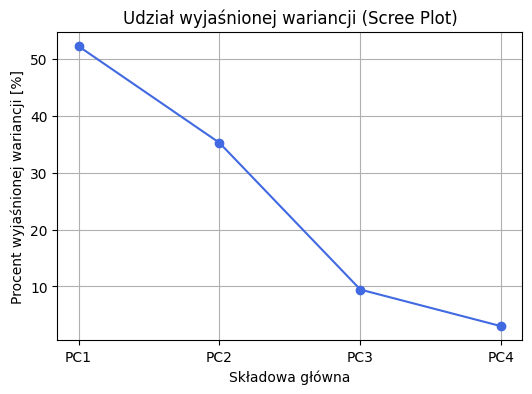

In [45]:
# fviz_eig (R): Python - wykres osypiska - wykres udziału wariancji (Scree plot) ---
plt.figure(figsize=(6,4))
x = [f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))]
y = 100 * pca.explained_variance_ratio_
plt.plot(x, y, marker='o', color='royalblue')
plt.title('Udział wyjaśnionej wariancji (Scree Plot)')
plt.xlabel('Składowa główna')
plt.ylabel('Procent wyjaśnionej wariancji [%]')
plt.grid(True)
plt.show()
#PC1 - 52% zmienności np PC1=-0.52⋅mpg-0.58⋅qsec+0.041⋅gear+0.62⋅carb
#PC2 - 35% zmienności np PC2 =0.507⋅mpg-0.199⋅qsec+0.8181⋅gear+0.1833⋅carb
#         PC1     PC2     PC3     PC4
#mpg  -0.5201  0.5074 -0.2365  0.6451
#qsec -0.5825 -0.1991  0.7877 -0.0243
#gear  0.0412  0.8181  0.2209 -0.5293
#carb  0.6233  0.1833  0.5242  0.5505

fviz_pca_ind → obserwacje (punkty – „individuals”)

Każda kropka na wykresie odpowiada jednej obserwacji (czyli jednemu wierszowi z Twojego zbioru mtcars, np. jednemu modelowi samochodu).

Oś X – PC1 (52.3%)
→ to pierwsza główna składowa, która tłumaczy ok. 52% całkowitej zmienności danych.
Wzdłuż tej osi dane różnią się najbardziej.

Oś Y – PC2 (35.3%)
→ to druga główna składowa, niezależna od PC1, tłumacząca kolejne 35% zmienności.

Łącznie te dwie osie pokazują ponad 87% całej informacji z oryginalnych danych.

Jak to interpretować

Punkty blisko siebie → obserwacje podobne względem wszystkich analizowanych zmiennych (mpg, qsec, gear, carb).

Punkty daleko od siebie → obserwacje różnią się w oryginalnych cechach.

Oś PC1 rozdziela obserwacje głównie według kombinacji zmiennych, które miały największy wpływ na PC1 (patrz ładunki – loadings).

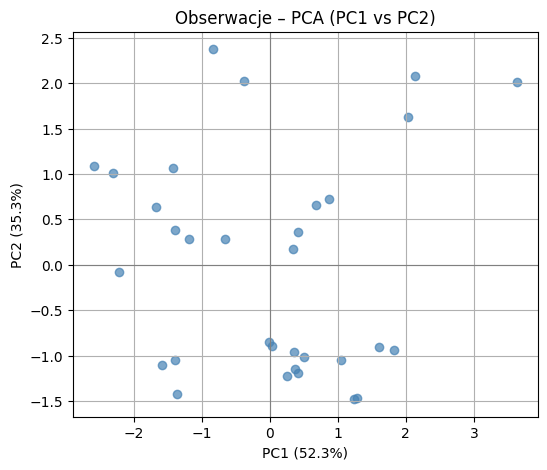

In [35]:
# --- fviz_pca_ind: obserwacje w przestrzeni PC1-PC2 ---
scores = pca.transform(X_std)
#
plt.figure(figsize=(6,5))
plt.scatter(scores[:,0], scores[:,1], c='steelblue', alpha=0.7)
plt.axhline(0, color='gray', lw=0.8)
plt.axvline(0, color='gray', lw=0.8)
plt.title('Obserwacje – PCA (PC1 vs PC2)')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
plt.grid(True)
plt.show()


In [49]:
import plotly.express as px #do interaktywnych wykresów
#
df_scores = pd.DataFrame(scores, columns=['PC1', 'PC2', 'PC3', 'PC4'])
df_scores['Car'] = df.index  # indexy samochodów aby były numerki
#wykres
fig = px.scatter(
    df_scores,
    x='PC1', y='PC2',
    text='Car',  # etykieta to nazwa samochodu
    hover_data=['PC1', 'PC2'],
    title=f"PCA – samochody (PC1: {pca.explained_variance_ratio_[0]*100:.1f}%, "
          f"PC2: {pca.explained_variance_ratio_[1]*100:.1f}%)",
    width=850, height=600
)
#
fig.update_traces(
    textposition='top center',
    marker=dict(size=8, color='royalblue', line=dict(width=1, color='DarkSlateGrey'))
)
fig.update_layout(
    template='plotly_white',
    xaxis_title='PC1',
    yaxis_title='PC2'
)

fig.show()



fviz_pca_var → zmienne (wektory – „variables”)

wykres zmiennych w przestrzeni PCA,
czyli tzw. „circle of correlations” albo mapę ładunków (fviz_pca_var() w R).

Każda strzałka to jedna zmienna oryginalna ze zbioru:
mpg, gear, carb, qsec.

Kierunek strzałki → pokazuje, jak zmienna jest skorelowana z osiami PC1 i PC2,

Długość strzałki → mówi, jak dobrze dana zmienna jest reprezentowana w tej 2D przestrzeni.

Długość strzałki

Im dłuższa strzałka (bliżej okręgu), tym lepiej ta zmienna jest wyjaśniona przez dwie pierwsze składowe (PC1, PC2).

np. jeśli carb jest blisko krawędzi okręgu → dobrze tłumaczona przez PCA,

jeśli jakaś zmienna byłaby krótka → słabo odwzorowana w tych dwóch wymiarach.

Kierunek strzałki

Pokazuje korelację z osiami głównymi:

Strzałka w prawo → dodatnia korelacja z PC1

Strzałka w lewo → ujemna korelacja z PC1

Strzałka w górę → dodatnia korelacja z PC2

Strzałka w dół → ujemna korelacja z PC2

Przykładowo:

jeśli gear celuje w górę, a carb w prawo →
to PC2 opisuje zmienność związaną z gear,
a PC1 z carb.

Kąt między strzałkami

Kąt odzwierciedla korelację między zmiennymi:

mały kąt (blisko siebie) → zmienne dodatnio skorelowane,

kąt 180° (naprzeciw siebie) → ujemnie skorelowane,

kąt 90° → brak korelacji.

W Twoim wykresie:

mpg i carb mają strzałki w przeciwnych kierunkach → silnie ujemna korelacja
(im więcej gaźników, tym mniejsze mpg — czyli większe spalanie),

gear i carb nie są blisko — więc nieskorelowane lub tylko lekko powiązane,

qsec (czas na 1/4 mili) może być w kierunku przeciwnym do mocy — czyli również ujemna zależność z carb.

To tzw. jednostkowe koło korelacji – promień = 1.
Jeśli koniec wektora leży na jego obrzeżu, to znaczy, że ta zmienna ma korelację ≈1 z którąś kombinacją PC1/PC2.
Jeśli jest bliżej środka – zmienna słabiej tłumaczona przez te dwa wymiary (jej informacja „rozlazła się” w dalsze PC).

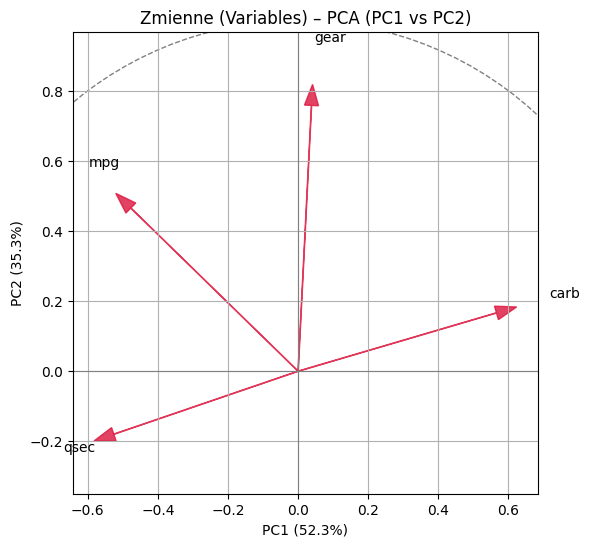

In [36]:
# fviz_pca_var: zmienne (ładunki)
loadings = pca.components_.T
plt.figure(figsize=(6,6))
#
# Jednostkowe koło korelacji
circle = plt.Circle((0,0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(circle)
#
for i, var in enumerate(X.columns):
    plt.arrow(0, 0, loadings[i,0], loadings[i,1],
              color='crimson', alpha=0.8,
              head_width=0.04, length_includes_head=True)
    plt.text(loadings[i,0]*1.15, loadings[i,1]*1.15, var, color='black', fontsize=10)
#
plt.axhline(0, color='gray', lw=0.8)
plt.axvline(0, color='gray', lw=0.8)
plt.title('Zmienne (Variables) – PCA (PC1 vs PC2)')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
plt.axis('equal')
plt.grid(True)
plt.show()


kod dla wpasowania wektorów w okrąg o r=1

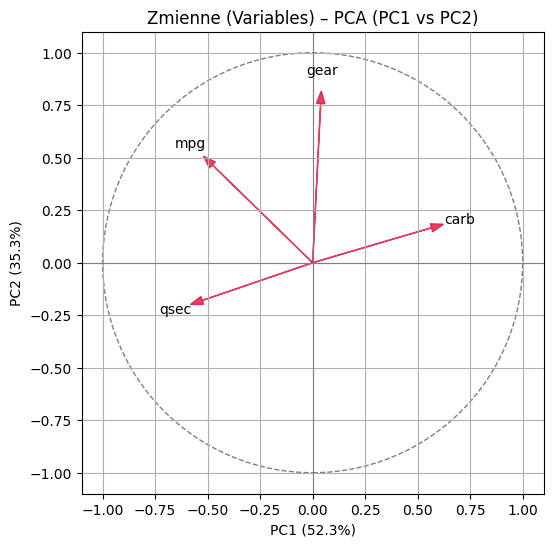

In [53]:
# fviz_pca_var: zmienne (ładunki)
loadings = pca.components_.T

plt.figure(figsize=(6,6))
ax = plt.gca()

# --- Jednostkowe koło korelacji ---
circle = plt.Circle((0,0), 1, color='gray', fill=False, linestyle='--', linewidth=1)
ax.add_artist(circle)

# --- Strzałki zmiennych ---
for i, var in enumerate(X.columns):
    plt.arrow(0, 0, loadings[i,0], loadings[i,1],
              color='crimson', alpha=0.8,
              head_width=0.04, length_includes_head=True)
    plt.text(loadings[i,0]*1.12, loadings[i,1]*1.12, var,
             color='black', fontsize=10, ha='center', va='center')

# --- Oś X i Y ---
plt.axhline(0, color='gray', lw=0.8)
plt.axvline(0, color='gray', lw=0.8)

# --- Tytuły ---
plt.title('Zmienne (Variables) – PCA (PC1 vs PC2)')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')

# --- Najważniejsze: ustawienia osi, by widać cały okrąg ---
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
ax.set_aspect('equal', adjustable='box')  # wymusza idealne proporcje
plt.grid(True)
plt.show()



fviz_pca_biplot → biplot (obserwacje + zmienne)

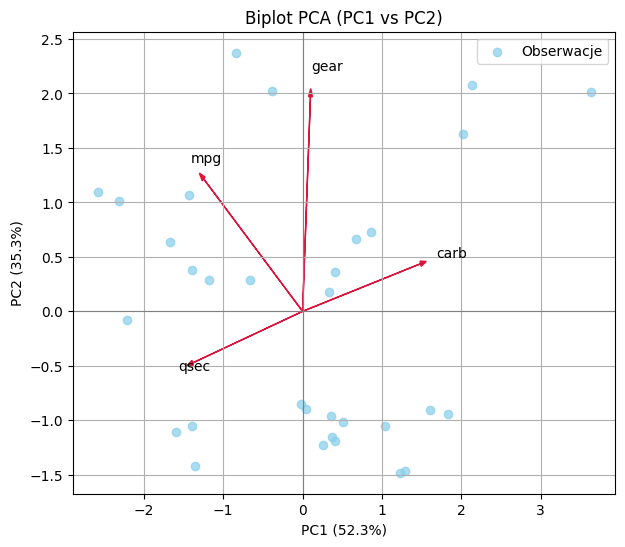

In [37]:
# fviz_pca_biplot: obserwacje + zmienne
plt.figure(figsize=(7,6))
#
# Punkty – obserwacje
plt.scatter(scores[:,0], scores[:,1], c='skyblue', alpha=0.7, label='Obserwacje')
#
# Wektory – zmienne
for i, var in enumerate(X.columns):
    plt.arrow(0, 0, loadings[i,0]*2.5, loadings[i,1]*2.5,
              color='crimson', head_width=0.05, length_includes_head=True)
    plt.text(loadings[i,0]*2.7, loadings[i,1]*2.7, var, color='black', fontsize=10)
#
plt.axhline(0, color='gray', lw=0.8)
plt.axvline(0, color='gray', lw=0.8)
plt.title('Biplot PCA (PC1 vs PC2)')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
plt.legend()
plt.grid(True)
plt.show()


ten sam wykres w plotly

In [56]:
#dane
scores = pca.transform(X_std)
loadings = pca.components_.T

#nindexy samochodów
car_names = df.index if df.index.is_unique else [f'Car{i+1}' for i in range(len(df))]
#
#wykres punktów (obserwacje)
fig = go.Figure()
#
fig.add_trace(go.Scatter(
    x=scores[:, 0],
    y=scores[:, 1],
    mode='markers+text',
    text=car_names,
    textposition='top center',
    marker=dict(size=8, color='skyblue'),
    name='Obserwacje',
    hovertemplate="<b>%{text}</b><br>PC1=%{x:.2f}<br>PC2=%{y:.2f}<extra></extra>"
))
#
# wektory zmiennych
for i, var in enumerate(X.columns):
    fig.add_trace(go.Scatter(
        x=[0, loadings[i, 0] * 2.5],
        y=[0, loadings[i, 1] * 2.5],
        mode='lines+text',
        line=dict(color='crimson', width=2),
        text=[None, var],
        textposition='top center',
        name=var,
        hoverinfo='text'
    ))
#
#wygląd wykresu
fig.update_layout(
    title=f"Biplot PCA (PC1 vs PC2)",
    xaxis_title=f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)",
    yaxis_title=f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)",
    width=800,
    height=700,
    template='plotly_white',
    showlegend=False
)
#
fig.show()
#

#punkt e

na ile wymiarów należy zrzutować przestrzeń obserwacji, by wyjaśnić co najmniej 96%
zmienności ?

To wychodzi z udziałów względnych

In [59]:
# kumulatywny procent wariancji
cumulative_var = np.cumsum(pca.explained_variance_ratio_) * 100
#
# minimalną liczbę wymiarów, które dają >=96%
dims_needed = np.argmax(cumulative_var >= 96) + 1
#
print("Kumulatywna wariancja [%]:", cumulative_var.round(2))
print(f"\nAby wyjaśnić 96% zmienności, potrzebne są {dims_needed} składowe.")


Kumulatywna wariancja [%]: [ 52.28  87.55  97.   100.  ]

Aby wyjaśnić 96% zmienności, potrzebne są 3 składowe.
